In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.signal
import scipy.io.wavfile
from sklearn.preprocessing import MinMaxScaler
import neurokit2 as nk

In [2]:
amel_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/amel_pulse_tkr.csv",sep =";")
andika_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/andika_pulse_tkr.csv",sep =";")
fauzi_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/fauzi_pulse_tkr.csv",sep =";")
kanwa_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/kanwa_pulse_tkr.csv",sep =";")
nandakkn_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/nandakkn_pulse_tkr.csv",sep =";")
nanda_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/nanda_pulse_tkr.csv",sep =";")
pradja_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/pradja_pulse_tkr.csv",sep =";")
raihan_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/raihan_pulse_tkr.csv",sep =";")
silvia_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/data_awal/silvia_pulse_tkr.csv",sep =";")
alikha_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/alikha_pulse_tkr.csv",sep =";")
anita_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/anita_pulse_tkr.csv",sep =";")
ecak_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/ecak_pulse_tkr.csv",sep =";")
nasah_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/nasah_pulse_tkr.csv",sep =";")
nyoman_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/nyoman_pulse_tkr.csv",sep =";")
nyu_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/nyu_pulse_tkr.csv",sep =";")
puci_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/puci_pulse_tkr.csv",sep =";")
roshied_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/roshied_pulse_tkr.csv",sep =";")
widi_pulse_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/belom_diedit/widi_pulse_tkr.csv",sep =";")
aldi_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/aldi_tkr.csv",skiprows=13,sep =",")
ary_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/ary_tkr.csv",skiprows=13,sep =",")
betari_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/betari_tkr.csv",skiprows=13,sep =",")
charisma_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/charisma_tkr.csv",skiprows=13,sep =",")
deva_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/deva_tkr.csv",skiprows=13,sep =",")
faiza_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/faiza_tkr.csv",skiprows=13,sep =",")
novi_tkr = pd.read_csv("https://raw.githubusercontent.com/Alwafauzan/skripsi/main/DASS/29-9-23/novi_tkr.csv",skiprows=13,sep =",")

In [3]:
alikha_pulse_tkr.drop(alikha_pulse_tkr.columns[1], axis=1, inplace=True)
anita_pulse_tkr.drop(anita_pulse_tkr.columns[1], axis=1, inplace=True)
ecak_pulse_tkr.drop(ecak_pulse_tkr.columns[1], axis=1, inplace=True)
nasah_pulse_tkr.drop(nasah_pulse_tkr.columns[1], axis=1, inplace=True)
nyoman_pulse_tkr.drop(nyoman_pulse_tkr.columns[1], axis=1, inplace=True)
nyu_pulse_tkr.drop(nyu_pulse_tkr.columns[1], axis=1, inplace=True)
puci_pulse_tkr.drop(puci_pulse_tkr.columns[1], axis=1, inplace=True)
roshied_pulse_tkr.drop(roshied_pulse_tkr.columns[1], axis=1, inplace=True)
widi_pulse_tkr.drop(widi_pulse_tkr.columns[1], axis=1, inplace=True)

In [12]:
def all(path):
  path.columns = ["ir","waktu"]
  path = path[(path.waktu >10)]
  path = path[(path.waktu <=190)]
  # minmax
  minmax = MinMaxScaler(feature_range=(0,1))

  path_minmax = minmax.fit_transform(path)
  path_minmax_ppg = pd.DataFrame(path_minmax)[0]

  df, info = nk.ppg_process(path_minmax_ppg, sampling_rate=100)
  analyze_df = nk.ppg_analyze(df, sampling_rate=100)

  return path,path_minmax,path_minmax_ppg,df,info,analyze_df

In [59]:
alikha_potong,alikha_minmax,alikha_minmax_seg,alikha_minmax_seg_signals, alikha_minmax_seg_info,alikha_minmax_seg_analyze = all(alikha_pulse_tkr)
anita_potong,anita_minmax,anita_minmax_seg,anita_minmax_seg_signals, anita_minmax_seg_info,anita_minmax_seg_analyze = all(anita_pulse_tkr)
ecak_potong,ecak_minmax,ecak_minmax_seg,ecak_minmax_seg_signals, ecak_minmax_seg_info,ecak_minmax_seg_analyze = all(ecak_pulse_tkr)
nasah_potong,nasah_minmax,nasah_minmax_seg,nasah_minmax_seg_signals, nasah_minmax_seg_info,nasah_minmax_seg_analyze = all(nasah_pulse_tkr)
nyoman_potong,nyoman_minmax,nyoman_minmax_seg,nyoman_minmax_seg_signals, nyoman_minmax_seg_info,nyoman_minmax_seg_analyze = all(nyoman_pulse_tkr)
nyu_potong,nyu_minmax,nyu_minmax_seg,nyu_minmax_seg_signals, nyu_minmax_seg_info,nyu_minmax_seg_analyze = all(nyu_pulse_tkr)
puci_potong,puci_minmax,puci_minmax_seg,puci_minmax_seg_signals, puci_minmax_seg_info,puci_minmax_seg_analyze = all(puci_pulse_tkr)
roshied_potong,roshied_minmax,roshied_minmax_seg,roshied_minmax_seg_signals, roshied_minmax_seg_info,roshied_minmax_seg_analyze = all(roshied_pulse_tkr)
widi_potong,widi_minmax,widi_minmax_seg,widi_minmax_seg_signals, widi_minmax_seg_info,widi_minmax_seg_analyze = all(widi_pulse_tkr)
aldi_tkr_potong,aldi_tkr_minmax,aldi_tkr_minmax_seg,aldi_minmax_seg_signals, aldi_minmax_seg_info,aldi_minmax_seg_analyze = all(aldi_tkr)
ary_tkr_potong,ary_tkr_minmax,ary_tkr_minmax_seg,ary_minmax_seg_signals, ary_minmax_seg_info,ary_minmax_seg_analyze = all(ary_tkr)
betari_tkr_potong,betari_tkr_minmax,betari_tkr_minmax_seg,betari_minmax_seg_signals, betari_minmax_seg_info,betari_minmax_seg_analyze = all(betari_tkr)
charisma_tkr_potong,charisma_tkr_minmax,charisma_tkr_minmax_seg,charisma_minmax_seg_signals, charisma_minmax_seg_info,charisma_minmax_seg_analyze = all(charisma_tkr)
deva_tkr_potong,deva_tkr_minmax,deva_tkr_minmax_seg,deva_minmax_seg_signals, deva_minmax_seg_info,deva_minmax_seg_analyze = all(deva_tkr)
faiza_tkr_potong,faiza_tkr_minmax,faiza_tkr_minmax_seg,faiza_minmax_seg_signals, faiza_minmax_seg_info,faiza_minmax_seg_analyze = all(faiza_tkr)
novi_tkr_potong,novi_tkr_minmax,novi_tkr_minmax_seg,novi_minmax_seg_signals, novi_minmax_seg_info,novi_minmax_seg_analyze = all(novi_tkr)
amel_potong,amel_minmax,amel_minmax_seg,amel_minmax_seg_signals, amel_minmax_seg_info,amel_minmax_seg_analyze = all(amel_pulse_tkr)
andika_potong,andika_minmax,andika_minmax_seg,andika_minmax_seg_signals, andika_minmax_seg_info,andika_minmax_seg_analyze = all(andika_pulse_tkr)
fauzi_potong,fauzi_minmax,fauzi_minmax_seg,fauzi_minmax_seg_signals, fauzi_minmax_seg_info,fauzi_minmax_seg_analyze = all(fauzi_pulse_tkr)
kanwa_potong,kanwa_minmax,kanwa_minmax_seg,kanwa_minmax_seg_signals, kanwa_minmax_seg_info,kanwa_minmax_seg_analyze = all(kanwa_pulse_tkr)
nandakkn_potong,nandakkn_minmax,nandakkn_minmax_seg,nandakkn_minmax_seg_signals, nandakkn_minmax_seg_info,nandakkn_minmax_seg_analyze = all(nandakkn_pulse_tkr)
nanda_potong,nanda_minmax,nanda_minmax_seg,nanda_minmax_seg_signals, nanda_minmax_seg_info,nanda_minmax_seg_analyze = all(nanda_pulse_tkr)
pradja_potong,pradja_minmax,pradja_minmax_seg,pradja_minmax_seg_signals, pradja_minmax_seg_info,pradja_minmax_seg_analyze = all(pradja_pulse_tkr)
raihan_potong,raihan_minmax,raihan_minmax_seg,raihan_minmax_seg_signals, raihan_minmax_seg_info,raihan_minmax_seg_analyze = all(raihan_pulse_tkr)
silvia_potong,silvia_minmax,silvia_minmax_seg,silvia_minmax_seg_signals, silvia_minmax_seg_info,silvia_minmax_seg_analyze = all(silvia_pulse_tkr)

# neurokit elgendi&nebian

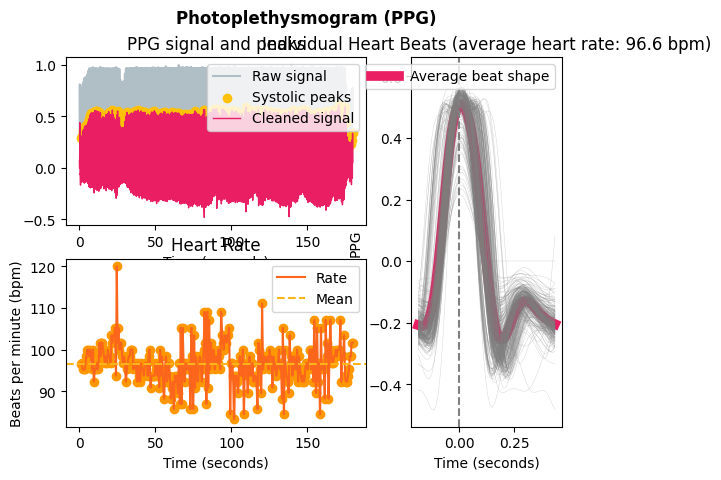

In [6]:
# nk.ppg_plot(signals, info)
nk.ppg_plot(nasah_minmax_seg_signals, nasah_minmax_seg_info)

In [8]:
novi_minmax_seg_analyze

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,88.881474,675.169811,41.056934,0.269388,41.063557,NaN,NaN,NaN,NaN,29.102744,...,2.197225,4.0171,1.194923,1.341833,1.437576,2.484405,1.78989,1.790109,3.565938,0.972057


In [9]:
nasah_minmax_seg_analyze

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,96.574333,621.631944,31.519751,4.168429,30.654521,NaN,NaN,NaN,NaN,45.205686,...,1.989936,3.596303,1.216008,1.368723,1.409316,2.281564,1.660505,1.931773,4.137406,0.992873


,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,HRV_SDSD,...,HRV_IQRNN,HRV_SDRMSSD,HRV_Prc20NN,HRV_Prc80NN,HRV_pNN50,HRV_pNN20,HRV_MinNN,HRV_MaxNN,HRV_HTI,HRV_TINN
0,675.169811,41.056934,0.269388,41.063557,NaN,NaN,NaN,NaN,29.102744,29.157921,...,50.0,1.410758,640.0,710.0,5.660377,38.867925,580.0,790.0,7.794118,85.9375


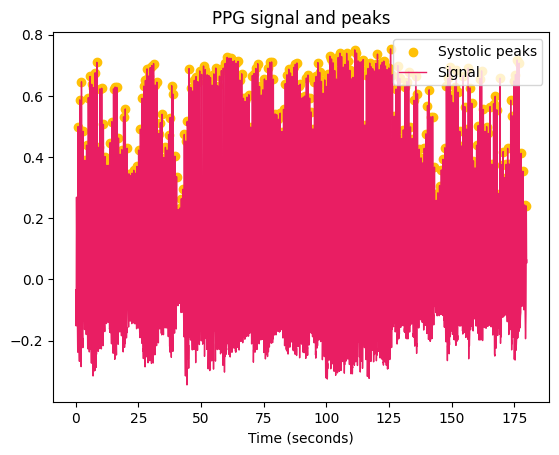

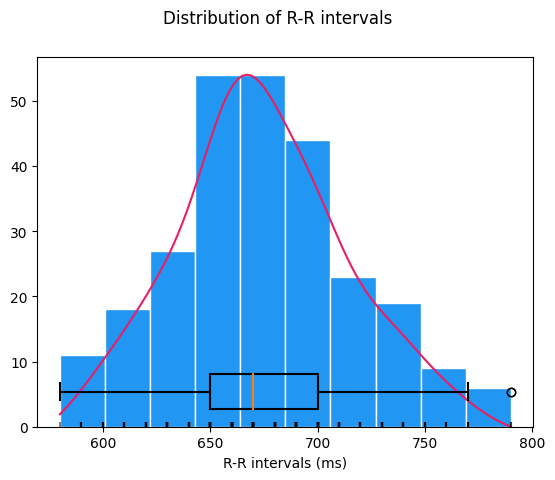

In [37]:
ppg_nebian = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=100, method='nabian2018')
ppg_elgendi = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=100, method='elgendi')
peaks, info = nk.ppg_peaks(ppg_elgendi, sampling_rate=100, method="elgendi", show=True)
hrv_time = nk.hrv_time(peaks, sampling_rate=100, show=True)
hrv_time

<Axes: >

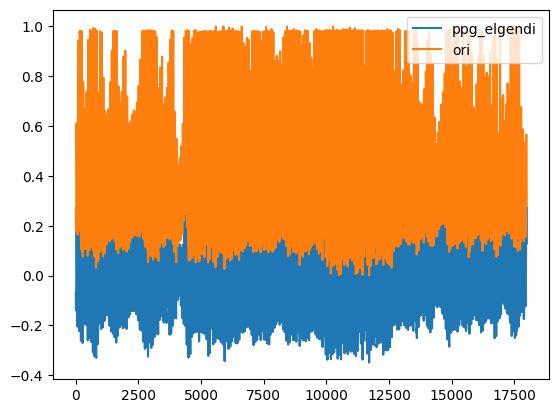

In [38]:
ppg_nebian = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=250, method='nabian2018')
ppg_elgendi = nk.ppg_clean(novi_tkr_preprocess_minmax_ppg, sampling_rate=250, method='elgendi')
pd.DataFrame({'ppg_elgendi': ppg_elgendi,'ori': novi_tkr_preprocess_minmax_ppg}).plot()

In [22]:
# peaks, info = nk.ppg_peaks(path_minmax_ppg, sampling_rate=250, method="elgendi", show=True)

In [23]:
# ppg_epochs = nk.ppg_segment(path_minmax_ppg, sampling_rate=100, show=True)

# aa

# buram

In [60]:
bpm_elgendi = [float(alikha_minmax_seg_analyze['PPG_Rate_Mean']),
float(anita_minmax_seg_analyze['PPG_Rate_Mean']),
float(ecak_minmax_seg_analyze['PPG_Rate_Mean']),
float(nasah_minmax_seg_analyze['PPG_Rate_Mean']),
float(nyoman_minmax_seg_analyze['PPG_Rate_Mean']),
float(nyu_minmax_seg_analyze['PPG_Rate_Mean']),
float(puci_minmax_seg_analyze['PPG_Rate_Mean']),
float(roshied_minmax_seg_analyze['PPG_Rate_Mean']),
float(widi_minmax_seg_analyze['PPG_Rate_Mean']),
float(aldi_minmax_seg_analyze['PPG_Rate_Mean']),
float(ary_minmax_seg_analyze['PPG_Rate_Mean']),
float(betari_minmax_seg_analyze['PPG_Rate_Mean']),
float(charisma_minmax_seg_analyze['PPG_Rate_Mean']),
float(deva_minmax_seg_analyze['PPG_Rate_Mean']),
float(faiza_minmax_seg_analyze['PPG_Rate_Mean']),
float(novi_minmax_seg_analyze['PPG_Rate_Mean']),
float(amel_minmax_seg_analyze['PPG_Rate_Mean']),
float(andika_minmax_seg_analyze['PPG_Rate_Mean']),
float(fauzi_minmax_seg_analyze['PPG_Rate_Mean']),
float(kanwa_minmax_seg_analyze['PPG_Rate_Mean']),
float(nandakkn_minmax_seg_analyze['PPG_Rate_Mean']),
float(nanda_minmax_seg_analyze['PPG_Rate_Mean']),
float(pradja_minmax_seg_analyze['PPG_Rate_Mean']),
float(raihan_minmax_seg_analyze['PPG_Rate_Mean']),
float(silvia_minmax_seg_analyze['PPG_Rate_Mean'])]

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\3792899453.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm_elgendi = [float(alikha_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\3792899453.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(anita_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\3792899453.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(ecak_minmax_seg_analyze['PPG_Rate_Mean']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\3792899453.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.il

In [61]:
hrv_elgendi = [float(alikha_minmax_seg_analyze['HRV_MeanNN']),
float(anita_minmax_seg_analyze['HRV_MeanNN']),
float(ecak_minmax_seg_analyze['HRV_MeanNN']),
float(nasah_minmax_seg_analyze['HRV_MeanNN']),
float(nyoman_minmax_seg_analyze['HRV_MeanNN']),
float(nyu_minmax_seg_analyze['HRV_MeanNN']),
float(puci_minmax_seg_analyze['HRV_MeanNN']),
float(roshied_minmax_seg_analyze['HRV_MeanNN']),
float(widi_minmax_seg_analyze['HRV_MeanNN']),
float(aldi_minmax_seg_analyze['HRV_MeanNN']),
float(ary_minmax_seg_analyze['HRV_MeanNN']),
float(betari_minmax_seg_analyze['HRV_MeanNN']),
float(charisma_minmax_seg_analyze['HRV_MeanNN']),
float(deva_minmax_seg_analyze['HRV_MeanNN']),
float(faiza_minmax_seg_analyze['HRV_MeanNN']),
float(novi_minmax_seg_analyze['HRV_MeanNN']),
float(amel_minmax_seg_analyze['HRV_MeanNN']),
float(andika_minmax_seg_analyze['HRV_MeanNN']),
float(fauzi_minmax_seg_analyze['HRV_MeanNN']),
float(kanwa_minmax_seg_analyze['HRV_MeanNN']),
float(nandakkn_minmax_seg_analyze['HRV_MeanNN']),
float(nanda_minmax_seg_analyze['HRV_MeanNN']),
float(pradja_minmax_seg_analyze['HRV_MeanNN']),
float(raihan_minmax_seg_analyze['HRV_MeanNN']),
float(silvia_minmax_seg_analyze['HRV_MeanNN'])]

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\2772894679.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv_elgendi = [float(alikha_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\2772894679.py:2: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(anita_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\2772894679.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(ecak_minmax_seg_analyze['HRV_MeanNN']),
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5196\2772894679.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) in

In [62]:
data = {'bpm_elgendi':bpm_elgendi,'hrv_elgendi':hrv_elgendi}
a = pd.DataFrame(data)
a.to_csv('a.csv')
# pd.DataFrame(a['bpm_elgendi'])